<a href="https://colab.research.google.com/github/master1223347/Linear-Regression-Model-With-One-Hot-Encoding/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

For this assignment, you will use the dataset loaded below (or another appropriate dataset of your choice) and perform the following steps that were demonstrated in the practice Notebook.

**Do not delete any instructor-provided cells from this Notebook.** If you accidentally delete a cell, you can either undo the action or load a copy of the original assignment Notebook in a new browser tab and copy over the missing cells.

**You can and should add cells to this Notebook.** To add a markdown (text) cell, hover your cursor beneath the cell where you want to insert and click the "+Text" button. To add a Python (code) cell, click the "+Code" button.

Steps:
- Inspect the data
  - Display each column's data types
  - For any non-numerical columns, display all possible values
  - Create histograms of all the columns
  - In a markdown (text) cell, briefly write about your findings. Do you see anything that might cause problems for your model?
- Visualize the data
  - Create one or more plots of the data
    - Tip: Experiment with different types of plots
  - In a markdown (text) cell, briefly describe your findings. Did you find anything unexpected in the data?
- Prepare the data
  - Remove null values
    - Explain your reasoning for the approach you chose.
  - Encode categorical features
  - Scale the original numerical features
  - Combine all columns using a method of your choice
    - Recommended: Use `make_column_transformer`
- Train a Model
  - Instantiate a Linear Regression model
  - Fit the training data to the model
- Evaluate the Model
  - Predict labels **using the training data**
    - Use RMSE to see how well your model did on the training labels
  - Predict labels **using the testing data**
    - Use RMSE to see how well your model did on the testing labels
  - In a markdown (text) cell, briefly describe your findings. Based on how the model performed on the training and testing data, does it appear to have overfit or underfit the data?
- Submit your Notebook as a PDF.
  - Re-run all cells using "Run all" at the top.
  - From the File menu, select Print to download as a PDF.
  - Upload this PDF to Canvas.

##Just a note:

This is one of my first times I've cleaned and trained a model on my own, so a lot of the parts of the notebook may be disorganzied.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn import compose
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import tree

# Load the Dataset

This dataset contains records of individual medical insurance costs from people across the United States. Each record tracks both the actual amount billed by health insurance (the `charges` column) and personal information about the insured such as age, gender, body mass index (BMI), whether they smoke, how many children they have, and which region of the US they live in.

These factors are known to influence medical expenses and insurance premiums. The goal of analyzing this dataset is to understand how demographic and lifestyle details impact medical costs, and to develop models (such as linear regression) that can predict insurance charges for new individuals. This type of analysis is important for insurers, healthcare organizations, and individuals to estimate costs and plan for care.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dkauffman-foothill/course-datasets/refs/heads/main/ml/insurance.csv")

# Inspect the Data

Display each column's data types.

In [ ]:
print(df) #just so I can see the data
df.info()

      Unnamed: 0  age     sex     bmi  children smoker     region      charges
0              0   19  female  27.900       0.0    yes  southwest  16884.92400
1              1   18    male  33.770       1.0     no  southeast   1725.55230
2              2   28    male  33.000       3.0     no  southeast   4449.46200
3              3   33    male  22.705       0.0     no  northwest  21984.47061
4              4   32    male  28.880       0.0     no  northwest   3866.85520
...          ...  ...     ...     ...       ...    ...        ...          ...
1333        1333   50    male  30.970       3.0     no  northwest  10600.54830
1334        1334   18  female  31.920       0.0     no  northeast   2205.98080
1335        1335   18  female  36.850       0.0     no  southeast   1629.83350
1336        1336   21  female  25.800       0.0     no  southwest   2007.94500
1337        1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 8 columns]
<class 'pandas.core.frame.D

For any non-numerical columns, display all possible values.

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"column: '{col}':")
        print(df[col].unique().tolist())

column: 'sex':
['female', 'male']
column: 'smoker':
['yes', 'no', nan]
column: 'region':
['southwest', 'southeast', 'northwest', 'northeast']


Create histograms of all the columns.

<Axes: xlabel='charges', ylabel='age'>

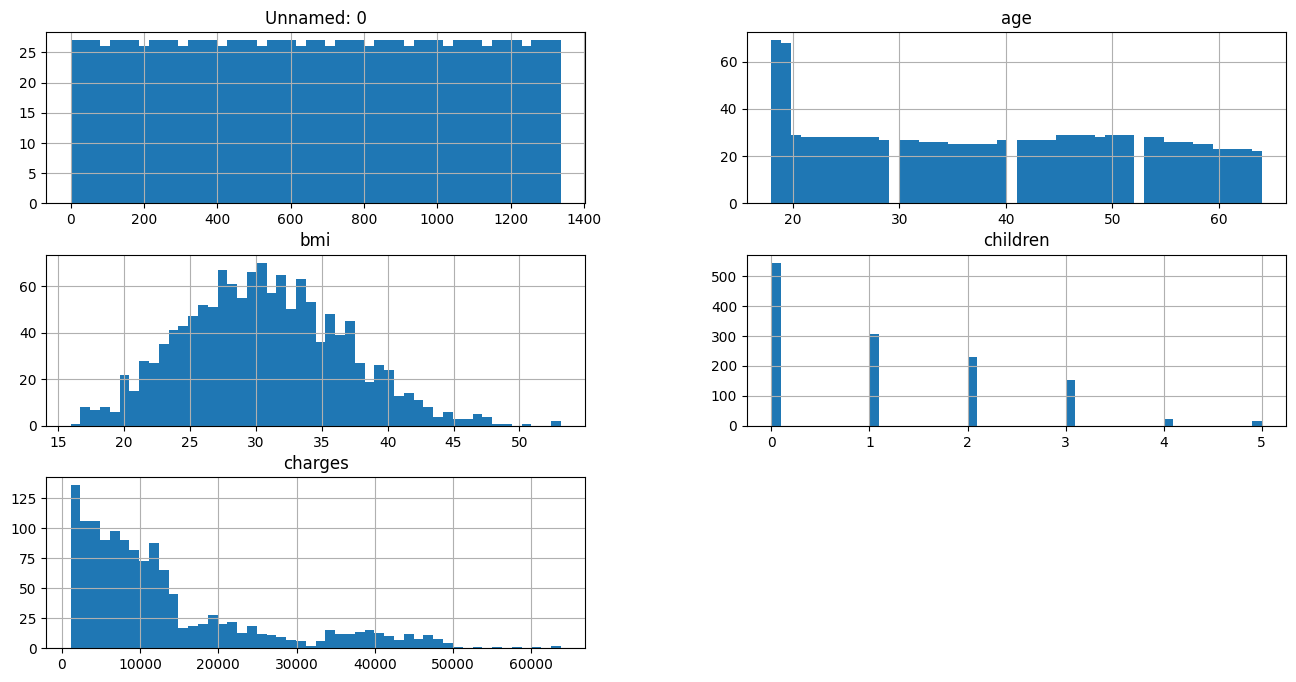

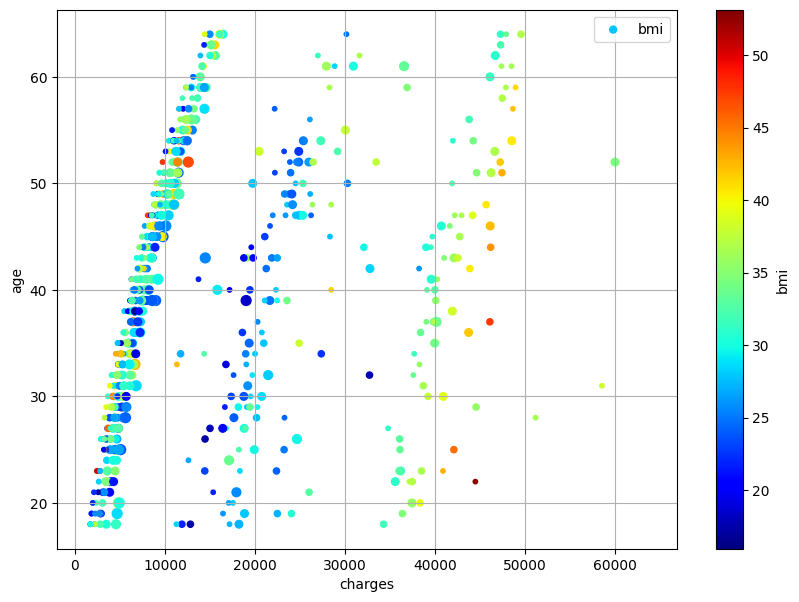

In [ ]:
df.hist(bins=50, figsize=(16, 8))

df.plot(
    kind="scatter",
    x="charges",
    y="age",
    grid=True,
    s=df["children"] * 10,
    label="bmi",
    c="bmi",
    cmap="jet",
    colorbar=True,
    legend=True,
    figsize=(10, 7)
)

In [ ]:
isnull = df.isnull().any(axis=1)
isnull

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


### Report Findings

Do you see anything that might cause problems for your model?



The "named: 0" table might cause an issue as it's an indexing element and does not have any revelence to the dataset, it could incorrectly skew data. There are also tables with null values which can skew data. there seems to be no capped data.

## Visualize the Data

Create one or more plots of the data; experiment with different types of plots.

### Report Findings

Did you find anything unexpected in the data?


charges seem to be correlated with age and BMI. There are 78 rows with missing values which have to be removed

# Prepare the Data

> Add blockquote



Remove any null values from the data. You can use the approach from the practice exercise, or you can use a different approach. Either way, justify your choice. You can create additional cells to show values such as the ratio of nulls cells.

In [ ]:
#create train and test sets
X = df.drop("charges", axis=1)
y = df["charges"].copy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='bmi', ylabel='children'>

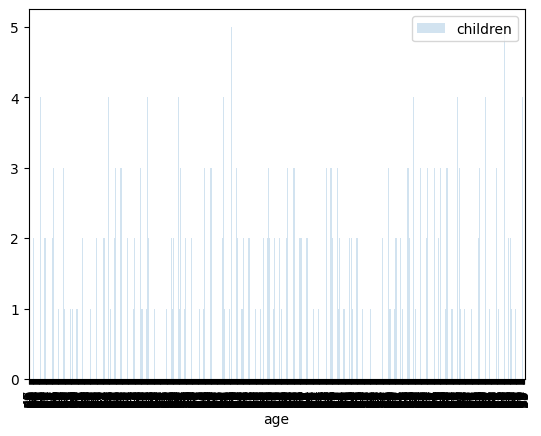

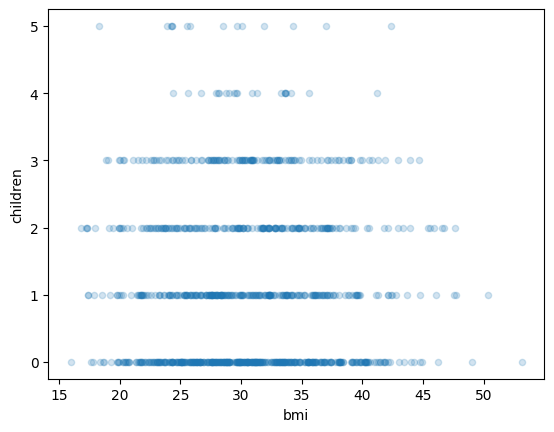

In [ ]:
#just messing around here looking at the data
X_train.plot(
    kind="bar",
    x="age",
    y="children",
    alpha=0.2
)

X_train.plot(
    kind="scatter",
    x="bmi",
    y="children",
    alpha=0.2
)

In [ ]:
isnull = X_train.isnull().any(axis=1)
isnull

,0
560,False
1285,False
1142,False
969,False
486,False
...,...
1095,False
1130,False
1294,False
860,False


In [ ]:
isnull_index = isnull[isnull].index
isnull_index

Index([ 209,  892,  135,   96, 1094,  332,  274, 1185,  242,  439, 1093,  579,
        938,  533,   92,   80,  596,  388,  924,  445, 1329,   79,  148, 1150,
        414,  364,  516,  587, 1287, 1132, 1258,  278,  694,  368, 1317, 1282,
        733,  989, 1164,  271,  691,  304,  407,  877, 1300, 1147,  632, 1020,
        742,  766, 1071,  134,  592, 1086, 1152,  878,  161, 1104, 1318,   91,
        189,  975,  871],
      dtype='int64')

In [ ]:
len(isnull_index)

63

In [ ]:
len(X_train.loc[isnull_index]) / len(X_train) # 5% of values are null

0.058878504672897194

In [ ]:
X_train.isnull().sum()

,0
Unnamed: 0,0
age,0
sex,0
bmi,0
children,53
smoker,10
region,0


In [ ]:
def RNR(
        X: pd.DataFrame,
        y: pd.Series
    ) -> tuple[pd.DataFrame, pd.Series]:

    isnull = X.isnull().any(axis=1)
    isnull_index = isnull[isnull].index
    return X.drop(isnull_index), y.drop(isnull_index)

In [ ]:
X_train, y_train = RNR(X_train, y_train)
X_test, y_test = RNR(X_test, y_test)

In [ ]:
isnull = X_train.isnull().any(axis=1)
isnull_index = isnull[isnull].index
len(isnull_index)

0

No more null values after cleansing

##Why

I used the

  def RNR(
          X: pd.DataFrame,
          y: pd.Series
    ) -> tuple[pd.DataFrame, pd.Series]:

    isnull = X.isnull().any(axis=1)
    isnull_index = isnull[isnull].index
    return X.drop(isnull_index), y.drop(isnull_index)

function as it fit for the sitation. It took a dataframe (X, which has every value but the anwers) and a series (Y, which has the answers). It then checks which values are True (or null) in X, then turns it into an index, and every y value in that index is dropped.

## Convert Categorical Features
You may use one-hot encoding (as in the practice exercise) or a different type of encoding.

In [ ]:
Sex_Cat_feature = X_train[["sex"]]
Smoker_Cat_feature = X_train[["smoker"]]
Region_Cat_feature = X_train[["region"]]

Sex_Cat_feature.value_counts()

,count
sex,
male,517
female,490


In [ ]:
Smoker_Cat_feature.value_counts()

,count
smoker,
no,798
yes,209


In [ ]:
Region_Cat_feature.value_counts()

,count
region,
southeast,268
northeast,249
southwest,248
northwest,242


#For This I Will Use One-Hot Encoding

In [ ]:
encoder = preprocessing.OneHotEncoder()
smoker_encoded_features = encoder.fit_transform(Sex_Cat_feature)
sex_encoded_features = encoder.fit_transform(Smoker_Cat_feature)
region_encoded_features = encoder.fit_transform(Region_Cat_feature)

In [ ]:
smoker_encoded_features.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
sex_encoded_features.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
region_encoded_features.toarray()

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

## Scale Numerical Features
You may use standardization (as in the practice exercise) or a different type of numerical scaling.

In [ ]:
numerical_only = X_train.drop(['sex', 'region', 'smoker', 'Unnamed: 0'], axis=1)
preprocessing.StandardScaler().fit_transform(numerical_only)

array([[ 0.46704394, -1.74643926,  0.7282431 ],
       [ 0.53805606, -1.02501654, -0.91601879],
       [ 0.89311665, -0.93587048, -0.91601879],
       ...,
       [ 1.31918935, -0.88386861, -0.91601879],
       [-0.17206511,  2.81816903,  0.7282431 ],
       [ 1.106153  , -0.10384062, -0.91601879]])

## Combine Features
Recommended: Use `make_column_transformer` from the practice exercise.

In [ ]:
transformer = compose.make_column_transformer(
    (
        # Standardize numerical features.
        preprocessing.StandardScaler(),
        compose.make_column_selector(dtype_include=np.number)
    ),
    (
        # Encode non-numerical features.
        preprocessing.OneHotEncoder(),
        compose.make_column_selector(dtype_include=object)
    )
)

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Train and Evaluate a Model

Instantiate a Linear Regression model.

In [ ]:
lin_reg = linear_model.LinearRegression()

Fit the training data to the model.


In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_train)
y_pred

array([ 6978.7581943 ,  8794.35729337,  9178.53193278, ...,
       11816.9473666 , 37278.17506361, 11564.54342389])

# Evaluate the Model

Predict labels using the training data. Use RMSE to see how well your model did on the training labels.


In [ ]:
lin_rmse = metrics.root_mean_squared_error(y_train, y_pred)
lin_rmse

5995.784470312664

Predict labels using the testing data. Use RMSE to see how well your model did on the testing labels.


In [ ]:
y_pred = lin_reg.predict(X_test)

final_rmse = metrics.root_mean_squared_error(y_test, y_pred)
final_rmse

5833.644920483882

### Report Findings

Based on how the model performed on the training and testing data, does it appear to have overfit or underfit the data?

Overfitting is when a model is too accustomed to the training data, and it recognizes noise which is not relevant to the data but still shows up. We can identfy overfitting by checking how a model preforms on training and new data. Since we can see that it preforms about as well on training and testing data, we know that the model isn't overfit. We can also tell the model isn't underfit as the number (5833) is close to what the model should get.